In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Any, Tuple
from scipy.signal import find_peaks

In [2]:
# Data Loading
X_model = pd.read_csv('../data/X_model.csv')
Y_model = pd.read_csv('../data/Y_model.csv')

# Combine X_model and Y_model
df = pd.concat([X_model, Y_model], axis=1)

In [3]:
X_c = df.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0)
X_t = df.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0)
X_s = df.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0)

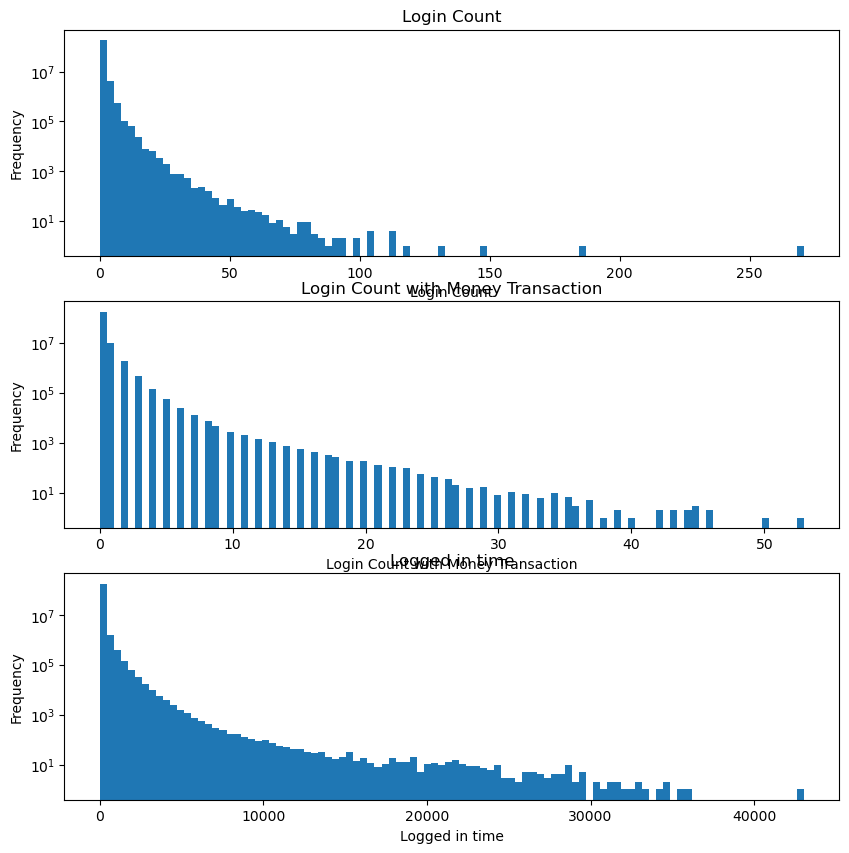

In [4]:
# Plot distribution of X_c, X_t, X_s in log scale
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes[0].set_title("Login Count")
axes[0].set_yscale('log')
axes[0].set_xlabel("Login Count")
axes[0].set_ylabel("Frequency")
axes[0].hist(X_c.values.flatten(), bins=100)
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_yscale('log')
axes[1].set_xlabel("Login Count with Money Transaction")
axes[1].set_ylabel("Frequency")
axes[1].hist(X_t.values.flatten(), bins=100)
axes[2].set_title("Logged in time")
axes[2].set_yscale('log')
axes[2].set_xlabel("Logged in time")
axes[2].set_ylabel("Frequency")
axes[2].hist(X_s.values.flatten(), bins=100)
plt.show()

In [48]:
# Do a PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_c)
X_c_pca = pca.transform(X_c)
pca.fit(X_t)
X_t_pca = pca.transform(X_t)
pca.fit(X_s)
X_s_pca = pca.transform(X_s)

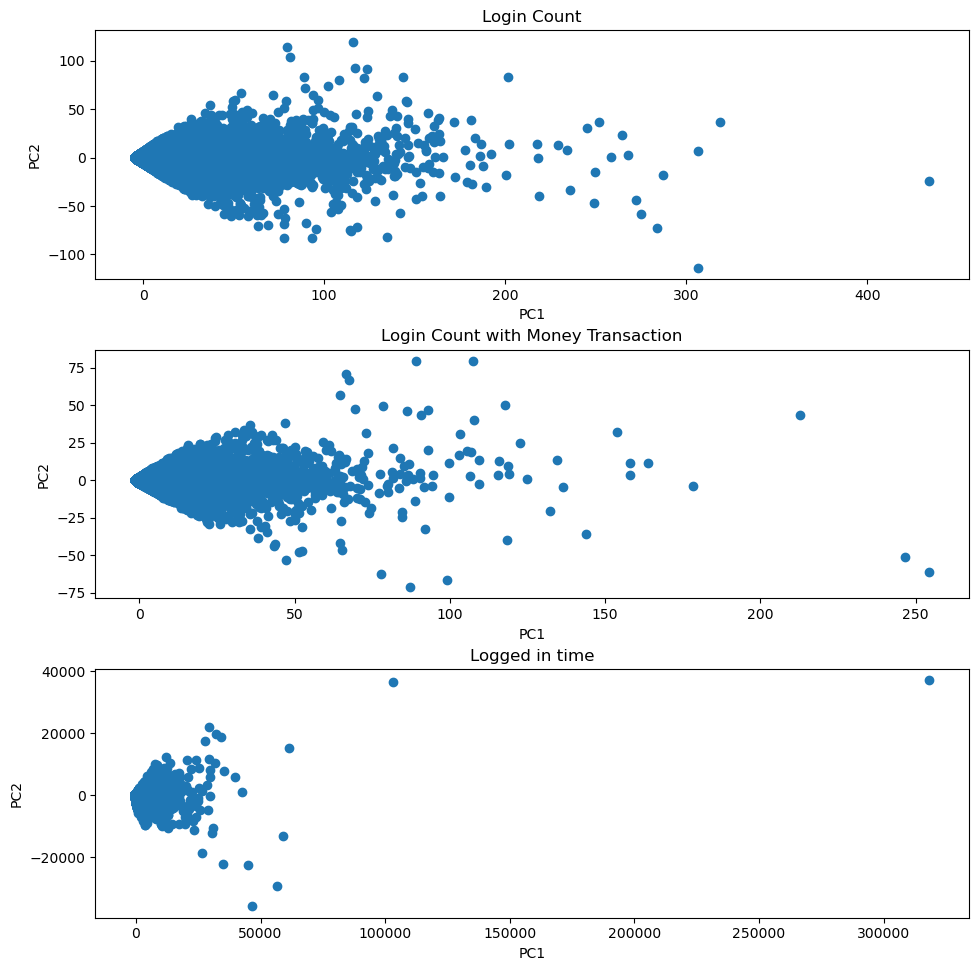

In [50]:
# Plot the PCA
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.tight_layout(pad=3.0)
axes[0].set_title("Login Count")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].scatter(X_c_pca[:, 0], X_c_pca[:, 1])
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].scatter(X_t_pca[:, 0], X_t_pca[:, 1])
axes[2].set_title("Logged in time")
axes[2].set_xlabel("PC1")
axes[2].set_ylabel("PC2")
axes[2].scatter(X_s_pca[:, 0], X_s_pca[:, 1])
plt.show()

In [3]:
# Create a filtered new dataframe of which business column of df has a value of 1
df_filtered = df[df['business'] == 1]
X_c_filtered = df_filtered.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0)
X_t_filtered = df_filtered.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0)
X_s_filtered = df_filtered.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0)

In [4]:
df_rest = df[df['business'] == 0]
X_c_rest = df_rest.filter(regex="c" + r"2022[0-9]*", axis=1).fillna(0)
X_t_rest = df_rest.filter(regex="t" + r"2022[0-9]*", axis=1).fillna(0)
X_s_rest = df_rest.filter(regex="s" + r"2022[0-9]*", axis=1).fillna(0)

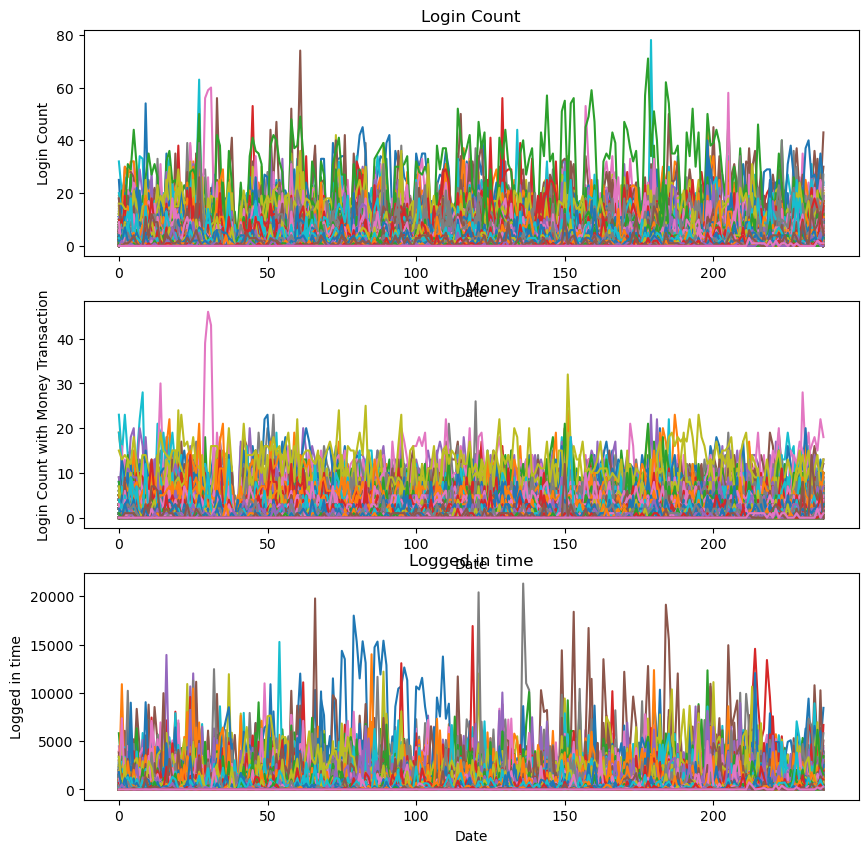

In [ ]:
# Plot a line graph of each row of X_c_filtered, X_t_filtered, X_s_filtered. Label x as date from 2022.01.01 to 2022.08.26
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes[0].set_title("Login Count")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Login Count")
axes[0].plot(X_c_filtered.values.T, '.', markersize=1, color="red")
axes[0].plot(X_c_rest.values.T, '.', markersize=1, color="blue")
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Login Count with Money Transaction")
axes[1].plot(X_t_filtered.values.T, '.', markersize=1, color="red")
axes[1].plot(X_t_rest.values.T, '.', markersize=1, color="blue")    
axes[2].set_title("Logged in time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Logged in time")
axes[2].plot(X_s_filtered.values.T, '.', markersize=1, color="red")
axes[2].plot(X_s_rest.values.T, '.', markersize=1, color="blue")
plt.show()

In [8]:
X_c_filtered.head()

,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,c20220108,c20220109,c20220110,...,c20220817,c20220818,c20220819,c20220820,c20220821,c20220822,c20220823,c20220824,c20220825,c20220826
36,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,2.0,2.0,1.0,8.0,4.0,4.0,3.0,2.0
49,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,1.0,0.0,0.0,0.0,1.0,3.0,6.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0
134,2.0,0.0,7.0,6.0,8.0,8.0,5.0,1.0,1.0,9.0,...,2.0,2.0,2.0,0.0,1.0,3.0,0.0,4.0,1.0,5.0


In [5]:
X_c_relative = X_c_filtered / X_c_filtered.sum(axis=1).values.reshape(-1, 1)
X_t_relative = X_t_filtered / X_t_filtered.sum(axis=1).values.reshape(-1, 1)
X_s_relative = X_s_filtered / X_s_filtered.sum(axis=1).values.reshape(-1, 1)

In [6]:
X_c_rest_relative = X_c_rest / X_c_rest.sum(axis=1).values.reshape(-1, 1)
X_t_rest_relative = X_t_rest / X_t_rest.sum(axis=1).values.reshape(-1, 1)
X_s_rest_relative = X_s_rest / X_s_rest.sum(axis=1).values.reshape(-1, 1)

In [7]:
# Make a label from 2022.01.01 to 2022.08.26. 15 days interval
date = pd.date_range("2022-01-01", "2022-08-26", freq="15D")
# Convert date to a list of string
date = date.strftime("%Y-%m-%d").tolist()
# Insert empty strings between each date
daterange = []
for d in date:
    daterange.append(d)
    [daterange.append("") for _ in range(14)]
daterange = daterange[0: 238]
daterange[-1] = "2022-08-26"

In [8]:
X_c_relative_mean = X_c_relative.mean(axis=0)
X_t_relative_mean = X_t_relative.mean(axis=0)
X_s_relative_mean = X_s_relative.mean(axis=0)

X_c_rest_relative_mean = X_c_rest_relative.mean(axis=0)
X_t_rest_relative_mean = X_t_rest_relative.mean(axis=0)
X_s_rest_relative_mean = X_s_rest_relative.mean(axis=0)

/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_5840/1647004658.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_5840/1647004658.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_5840/1647004658.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(daterange, rotation=90)


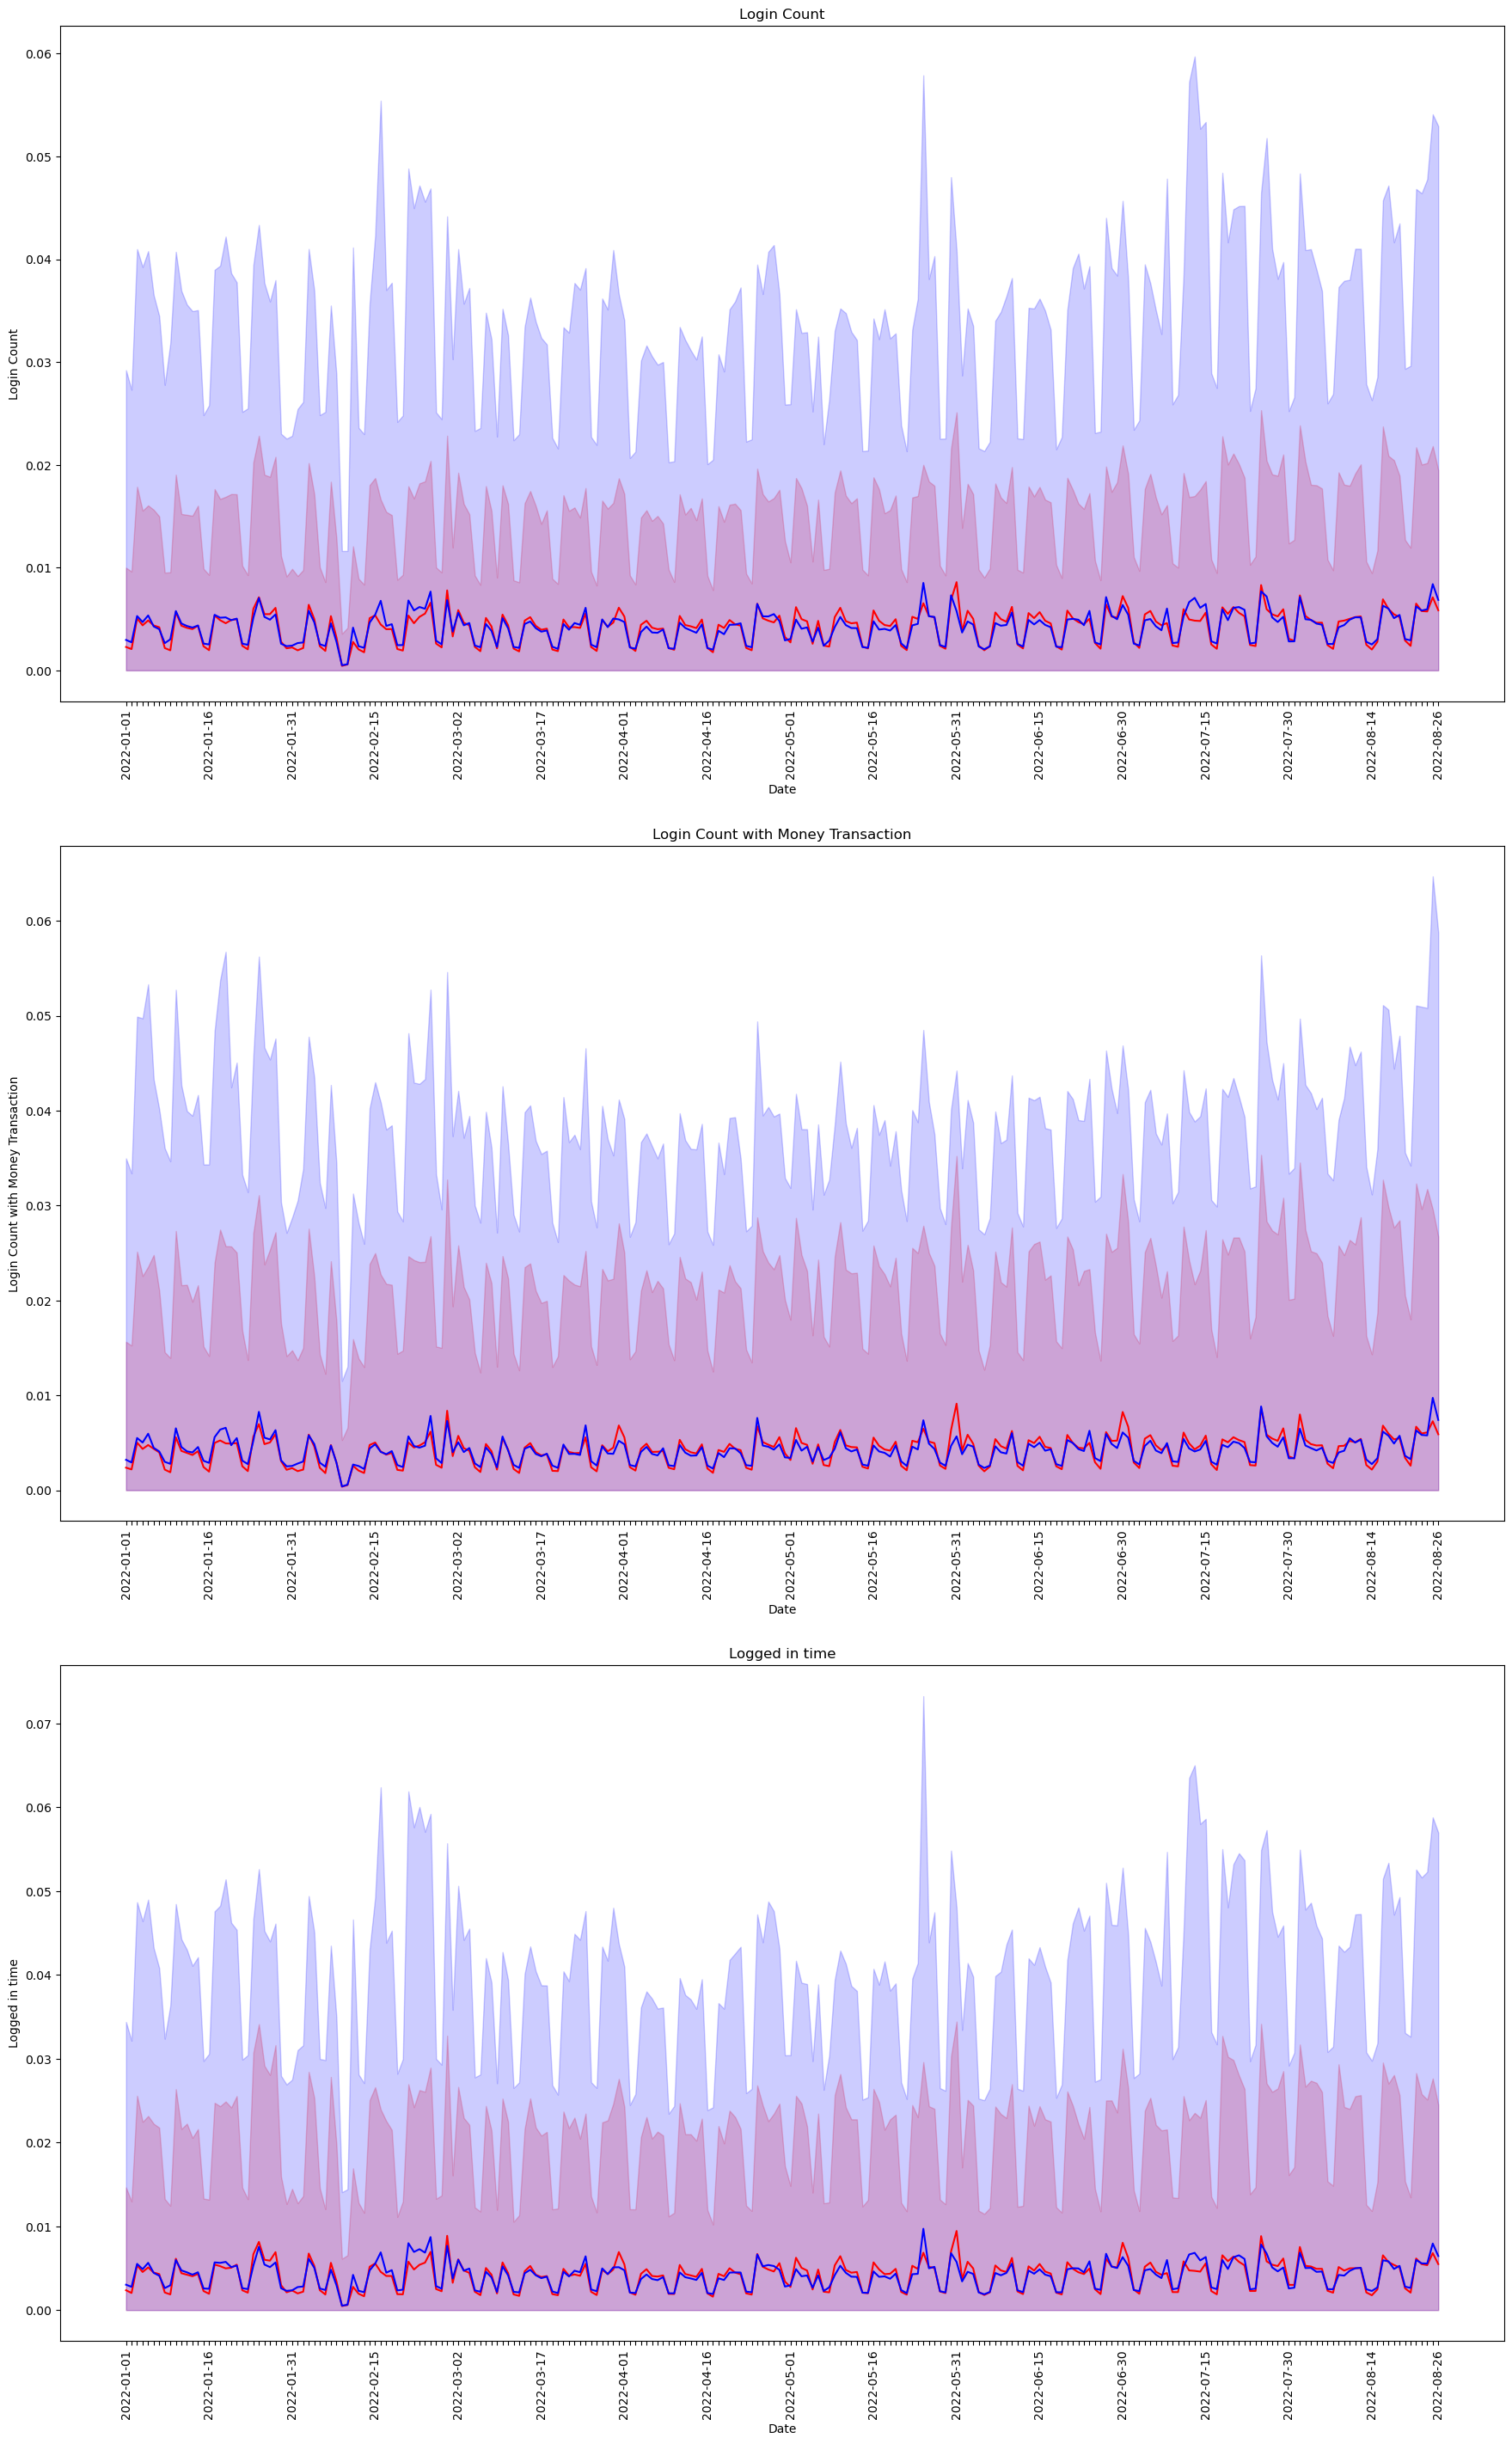

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(20, 30))
fig.tight_layout(pad=10.0)
axes[0].set_title("Login Count")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Login Count")
axes[0].set_xticklabels(daterange, rotation=90)
axes[0].plot(X_c_relative_mean, color="red")
axes[0].plot(X_c_rest_relative_mean, color="blue")
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Login Count with Money Transaction")
axes[1].set_xticklabels(daterange, rotation=90)
axes[1].plot(X_t_relative_mean, color="red")
axes[1].plot(X_t_rest_relative_mean, color="blue")
axes[2].set_title("Logged in time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Logged in time")
axes[2].set_xticklabels(daterange, rotation=90)
axes[2].plot(X_s_relative_mean, color="red")
axes[2].plot(X_s_rest_relative_mean, color="blue")

axes[0].fill_between(range(238), 0, X_c_relative_mean + X_c_relative.std(axis=0), color="red", alpha=0.2)
axes[0].fill_between(range(238), 0, X_c_rest_relative_mean + X_c_rest_relative.std(axis=0), color="blue", alpha=0.2)
axes[1].fill_between(range(238), 0, X_t_relative_mean + X_t_relative.std(axis=0), color="red", alpha=0.2)
axes[1].fill_between(range(238), 0, X_t_rest_relative_mean + X_t_rest_relative.std(axis=0), color="blue", alpha=0.2)
axes[2].fill_between(range(238), 0, X_s_relative_mean + X_s_relative.std(axis=0), color="red", alpha=0.2)
axes[2].fill_between(range(238), 0, X_s_rest_relative_mean + X_s_rest_relative.std(axis=0), color="blue", alpha=0.2)

plt.show()

In [23]:
X_c_relative_diff = 100 * (X_c_relative_mean - X_c_rest_relative_mean)
X_t_relative_diff = 100 * (X_t_relative_mean - X_t_rest_relative_mean)
X_s_relative_diff = 100 * (X_s_relative_mean - X_s_rest_relative_mean)

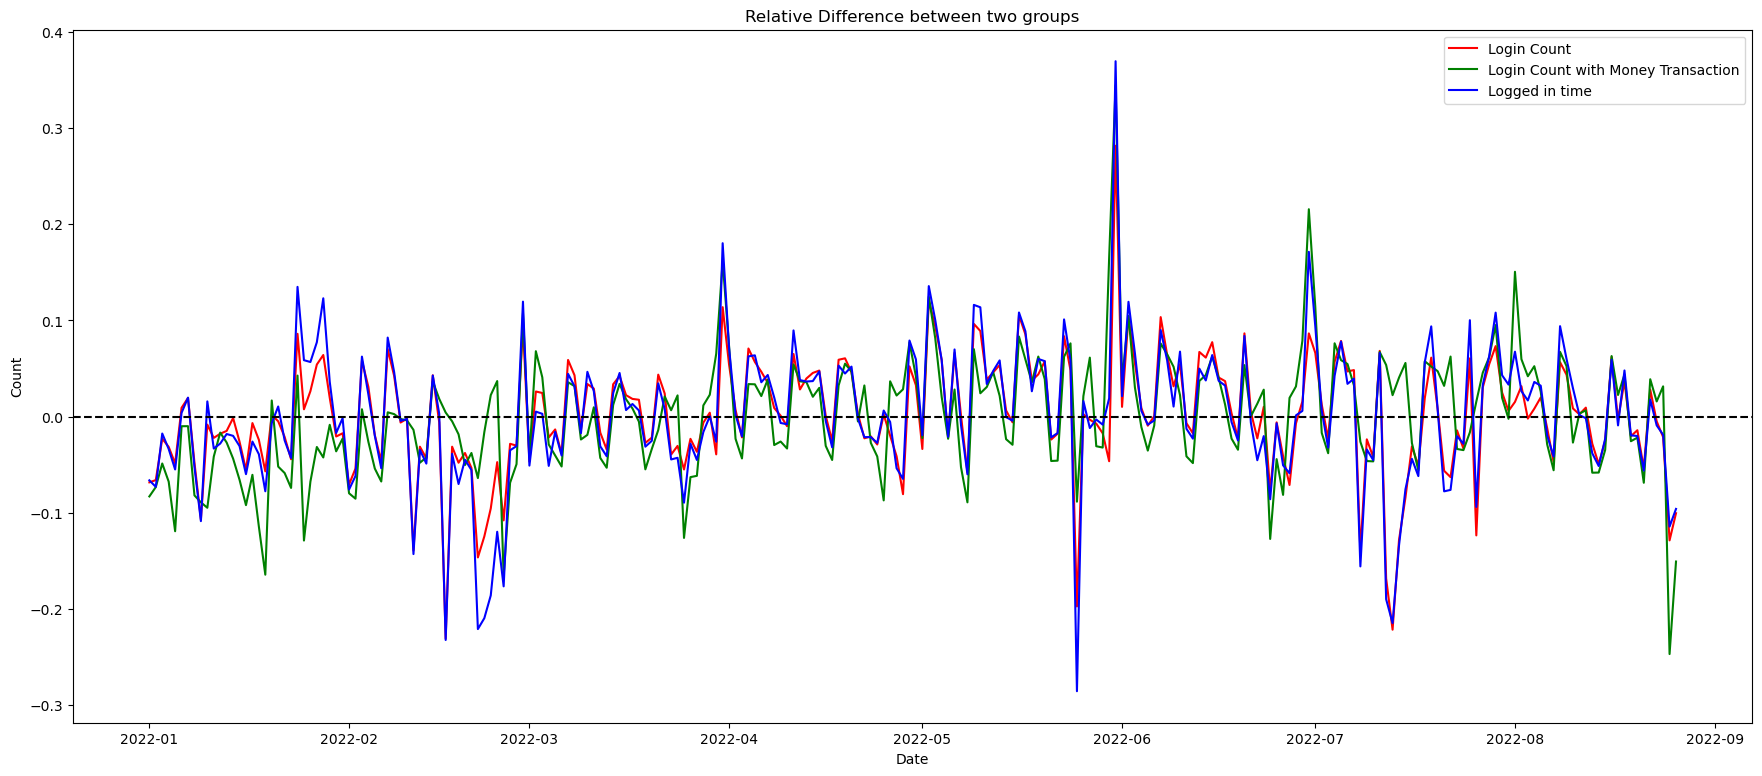

In [34]:
date = pd.date_range("2022-01-01", "2022-08-26", freq="1D")
# Plot X_c_relative_diff, X_t_relative_diff, X_s_relative_diff in one figure. Show legend in the figure.
fig, ax = plt.subplots(figsize=(20, 10))
fig.tight_layout(pad=10.0)
ax.set_title("Relative Difference between two groups")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.plot(date, X_c_relative_diff.values.T, color="red", label="Login Count")
ax.plot(date, X_t_relative_diff.values.T, color="green", label="Login Count with Money Transaction")
ax.plot(date, X_s_relative_diff.values.T, color="blue", label="Logged in time")
ax.legend()

# Draw horizontal line art y=0

ax.axhline(y=0, color="black", linestyle="--")

# Draw vertical line at each of end of month

# line_points = [
#     -1 + (31 + 32) / 2, # Time between Jan.31 and Feb.1
#     -1 + 31 + (28 + 29) / 2, # Time between Feb.28 and Mar.1
#     -1 + 31 + 28 + (31 + 32) / 2, # Time between Mar.31 and Apr.1
#     -1 + 31 + 28 + 31 + (30 + 31) / 2, # Time between Apr.30 and May.1
#     -1 + 31 + 28 + 31 + 30 + (31 + 32) / 2, # Time between May.31 and Jun.1
#     -1 + 31 + 28 + 31 + 30 + 31 + (30 + 31) / 2, # Time between Jun.30 and Jul.1
#     -1 + 31 + 28 + 31 + 30 + 31 + 30 + (31 + 32) / 2, # Time between Jul.31 and Aug.1
# ]
# line_points = list(map(lambda x: 1643673600 + x * 86400, line_points))

# for point in line_points:
#     ax.axvline(x=point, color="yellow", linestyle="--")

plt.show()

/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_16630/3756444639.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_16630/3756444639.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_16630/3756444639.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(daterange, rotation=90)


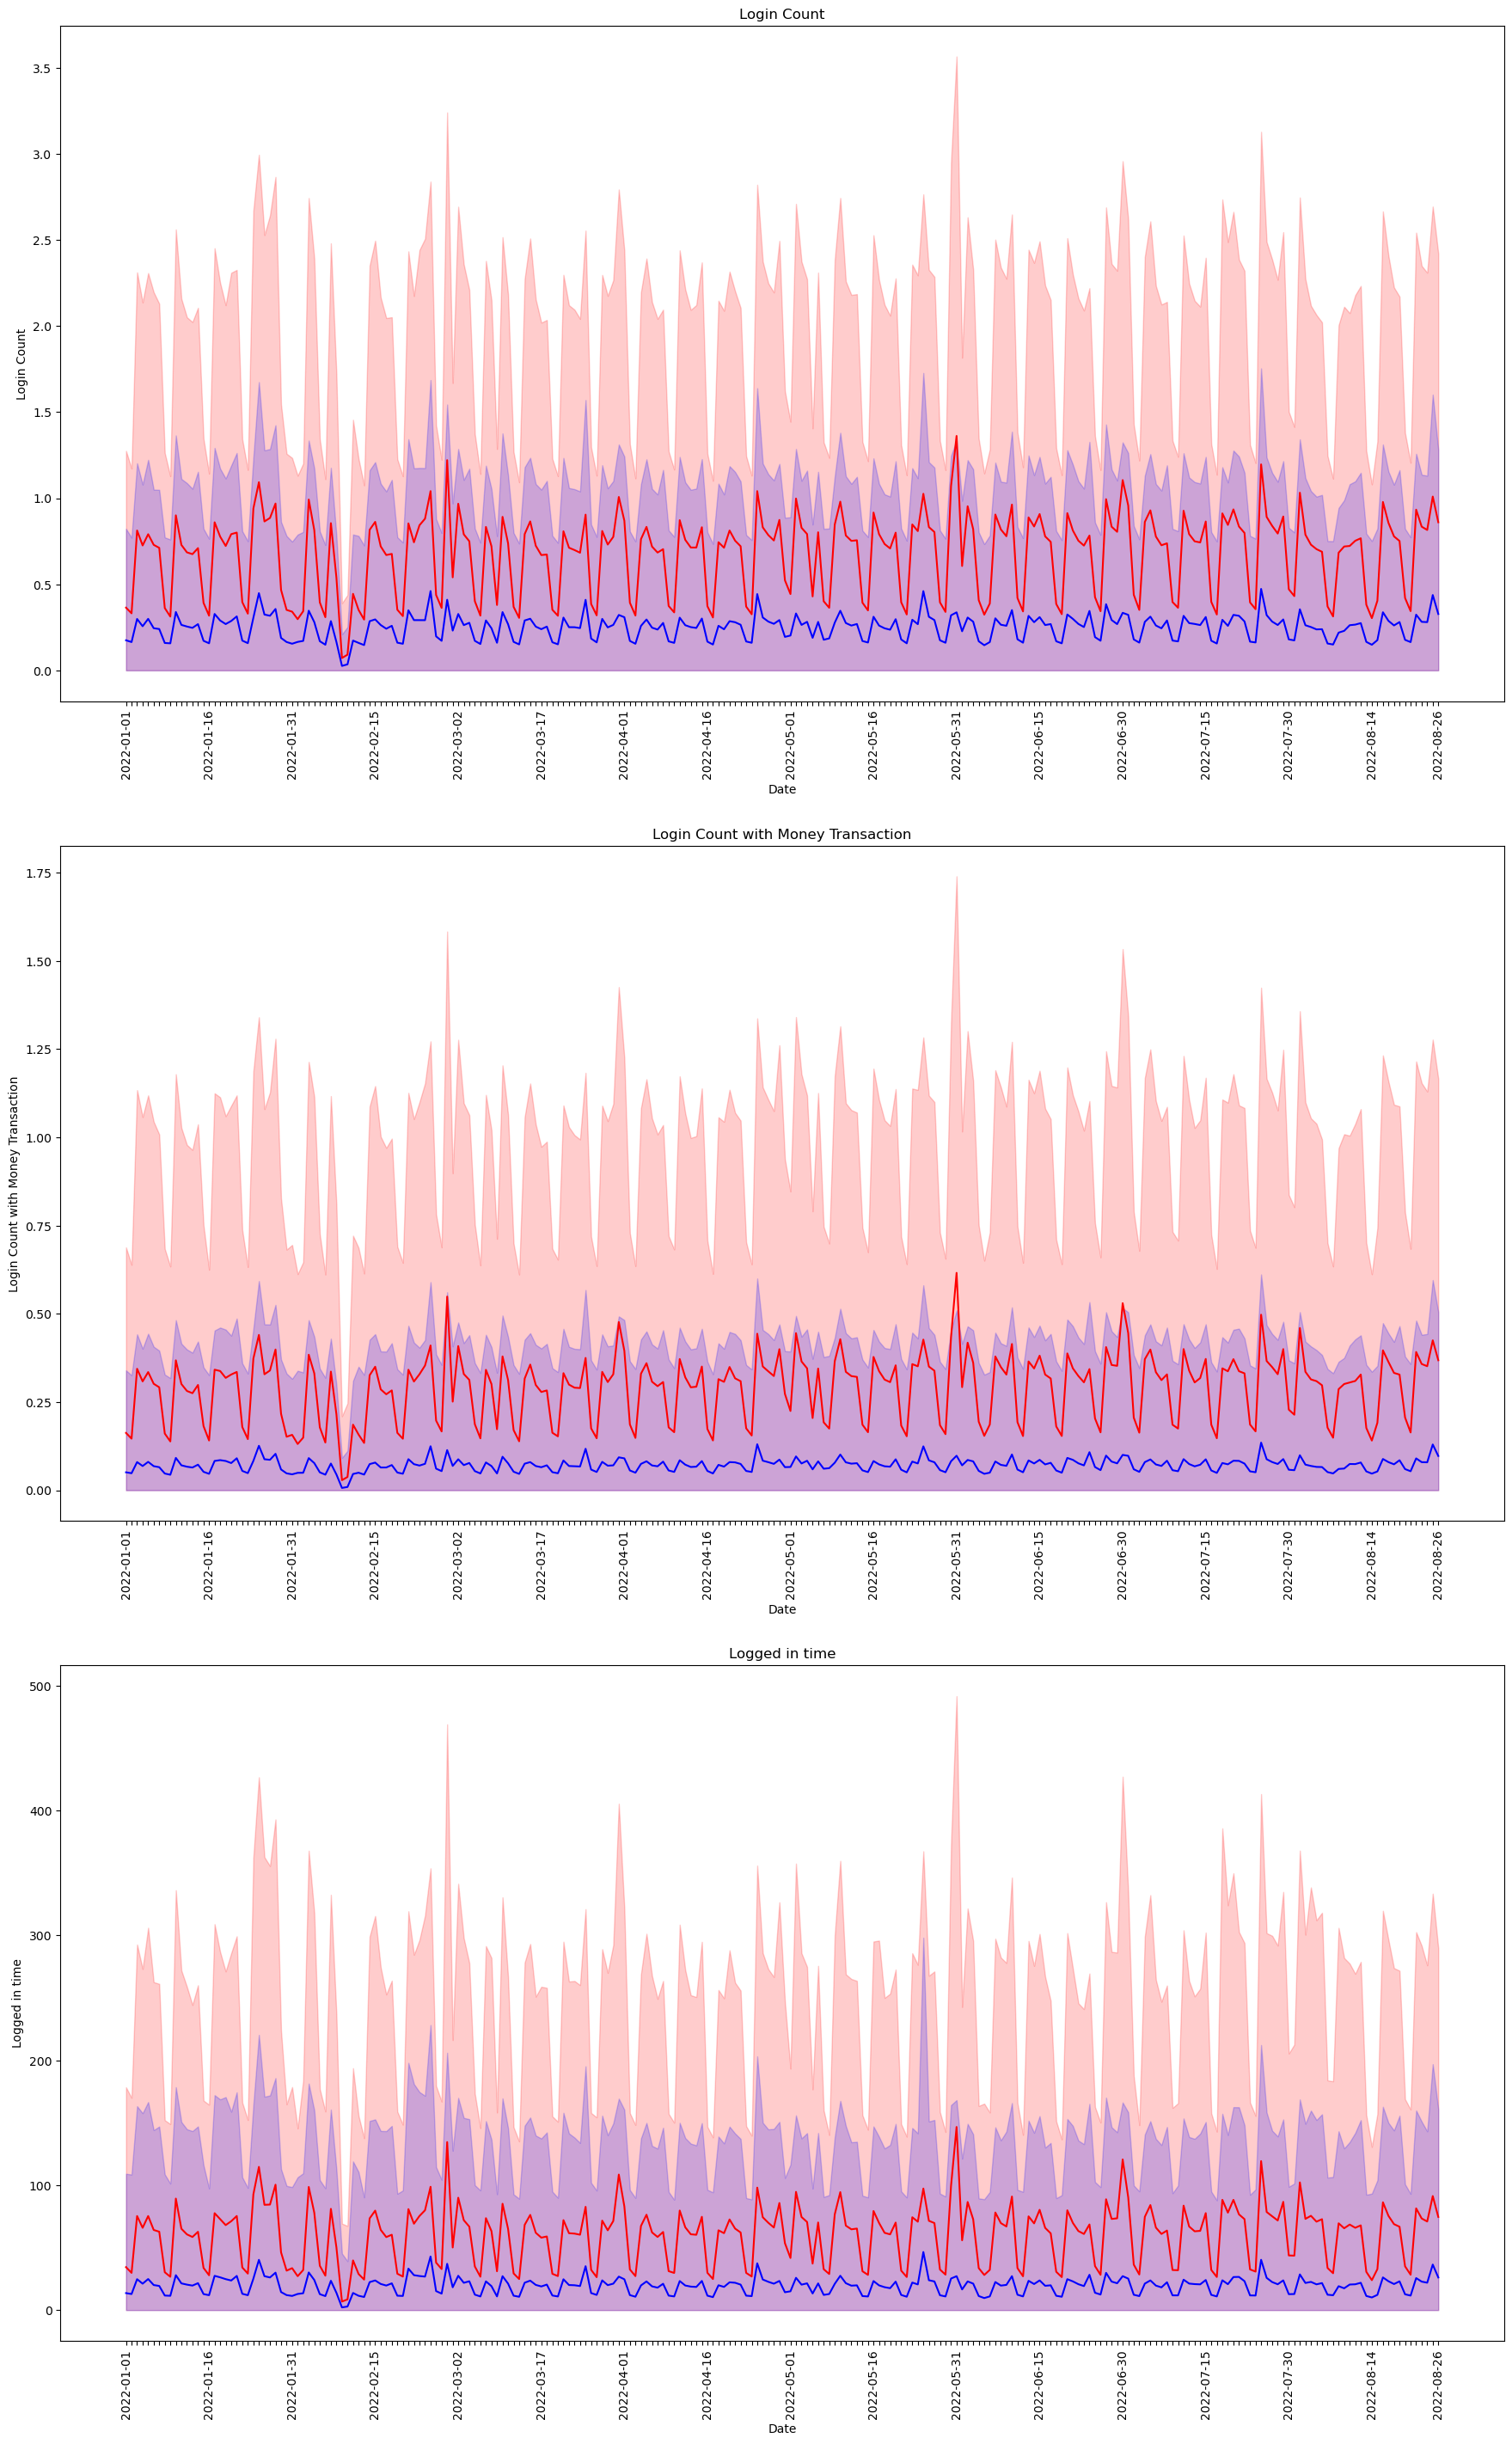

In [55]:
# Plot average of each columns of X_c_filtered, X_t_filtered, X_s_filtered. Big fig size
fig, axes = plt.subplots(3, 1, figsize=(20, 30))
fig.tight_layout(pad=10.0)
axes[0].set_title("Login Count")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Login Count")
axes[0].plot(X_c_filtered.mean(axis=0), color="red")
axes[0].plot(X_c_rest.mean(axis=0), color="blue")
axes[0].set_xticklabels(daterange, rotation=90)
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Login Count with Money Transaction")
axes[1].plot(X_t_filtered.mean(axis=0), color="red")
axes[1].plot(X_t_rest.mean(axis=0), color="blue")
axes[1].set_xticklabels(daterange, rotation=90)
axes[2].set_title("Logged in time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Logged in time")
axes[2].plot(X_s_filtered.mean(axis=0), color="red")
axes[2].plot(X_s_rest.mean(axis=0), color="blue")
axes[2].set_xticklabels(daterange, rotation=90)

# Overlay standard deviation of each columns of X_c_filtered, X_t_filtered, X_s_filtered. Overlaying graph is bigger than 0
axes[0].fill_between(range(238), 0, X_c_filtered.mean(axis=0) + X_c_filtered.std(axis=0), color="red", alpha=0.2)
axes[0].fill_between(range(238), 0, X_c_rest.mean(axis=0) + X_c_rest.std(axis=0), color="blue", alpha=0.2)
axes[1].fill_between(range(238), 0, X_t_filtered.mean(axis=0) + X_t_filtered.std(axis=0), color="red", alpha=0.2)
axes[1].fill_between(range(238), 0, X_t_rest.mean(axis=0) + X_t_rest.std(axis=0), color="blue", alpha=0.2)
axes[2].fill_between(range(238), 0, X_s_filtered.mean(axis=0) + X_s_filtered.std(axis=0), color="red", alpha=0.2)
axes[2].fill_between(range(238), 0, X_s_rest.mean(axis=0) + X_s_rest.std(axis=0), color="blue", alpha=0.2)

plt.show()

In [58]:
# Get index of peaks of average each columns of X_c_filtered, X_t_filtered, X_s_filtered
peaks_c = find_peaks(X_c_filtered.mean(axis=0), height=0)[0]
peaks_t = find_peaks(X_t_filtered.mean(axis=0), height=0)[0]
peaks_s = find_peaks(X_s_filtered.mean(axis=0), height=0)[0]
print("Login Count peaks: ", peaks_c)
print("Login Count with Money Transaction peaks: ", peaks_t)
print("Logged in time peaks: ", peaks_s)

# Get index of peaks of average each columns of X_c_rest, X_t_rest, X_s_rest
peaks_c_rest = find_peaks(X_c_rest.mean(axis=0), height=0)[0]
peaks_t_rest = find_peaks(X_t_rest.mean(axis=0), height=0)[0]
peaks_s_rest = find_peaks(X_s_rest.mean(axis=0), height=0)[0]
print("Login Count peaks: ", peaks_c_rest)
print("Login Count with Money Transaction peaks: ", peaks_t_rest)
print("Logged in time peaks: ", peaks_s_rest)

Login Count peaks:  [  2   4   9  13  16  20  24  27  33  37  41  45  48  51  55  58  60  65
  68  73  76  79  83  86  89  94  97 100 104 107 109 114 118 121 125 129
 132 135 139 142 144 150 152 157 160 163 165 170 174 177 180 185 188 191
 195 198 200 205 209 212 223 227 233 236]
Login Count with Money Transaction peaks:  [  2   4   9  13  16  20  24  27  30  33  37  41  45  48  51  55  58  60
  65  68  73  76  79  83  86  89  94  97 100 104 107 109 114 118 121 125
 129 135 139 142 144 150 152 157 160 163 165 170 174 177 180 185 188 191
 195 198 200 205 209 212 223 227 233 236]
Logged in time peaks:  [  2   4   9  13  16  20  24  27  30  33  37  41  45  48  51  55  58  60
  65  68  73  76  79  83  86  89  94  97 100 104 107 109 114 118 121 125
 129 132 135 139 142 144 150 152 157 160 163 165 170 174 177 180 185 188
 191 195 198 200 205 209 212 214 216 219 221 223 227 233 236]
Login Count peaks:  [  2   4   9  13  16  20  24  27  33  37  41  45  48  51  55  58  60  62
  65  68  73  76  

In [65]:
# Define X_c_diff, X_t_diff, X_s_diff. X_c_diff is the difference between X_c_filtered and X_c_rest
X_c_diff = X_c_filtered.mean(axis=0) - X_c_rest.mean(axis=0)
X_t_diff = X_t_filtered.mean(axis=0) - X_t_rest.mean(axis=0)
X_s_diff = X_s_filtered.mean(axis=0) - X_s_rest.mean(axis=0)

# Get peaks of X_c_diff, X_t_diff, X_s_diff
peaks_c_diff = find_peaks(X_c_diff, height=0)[0]
peaks_t_diff = find_peaks(X_t_diff, height=0)[0]
peaks_s_diff = find_peaks(X_s_diff, height=0)[0]

/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_16630/1229256176.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_16630/1229256176.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(daterange, rotation=90)
/var/folders/xf/sy2fwpl54bzcxvmkf38nzntw0000gn/T/ipykernel_16630/1229256176.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(daterange, rotation=90)


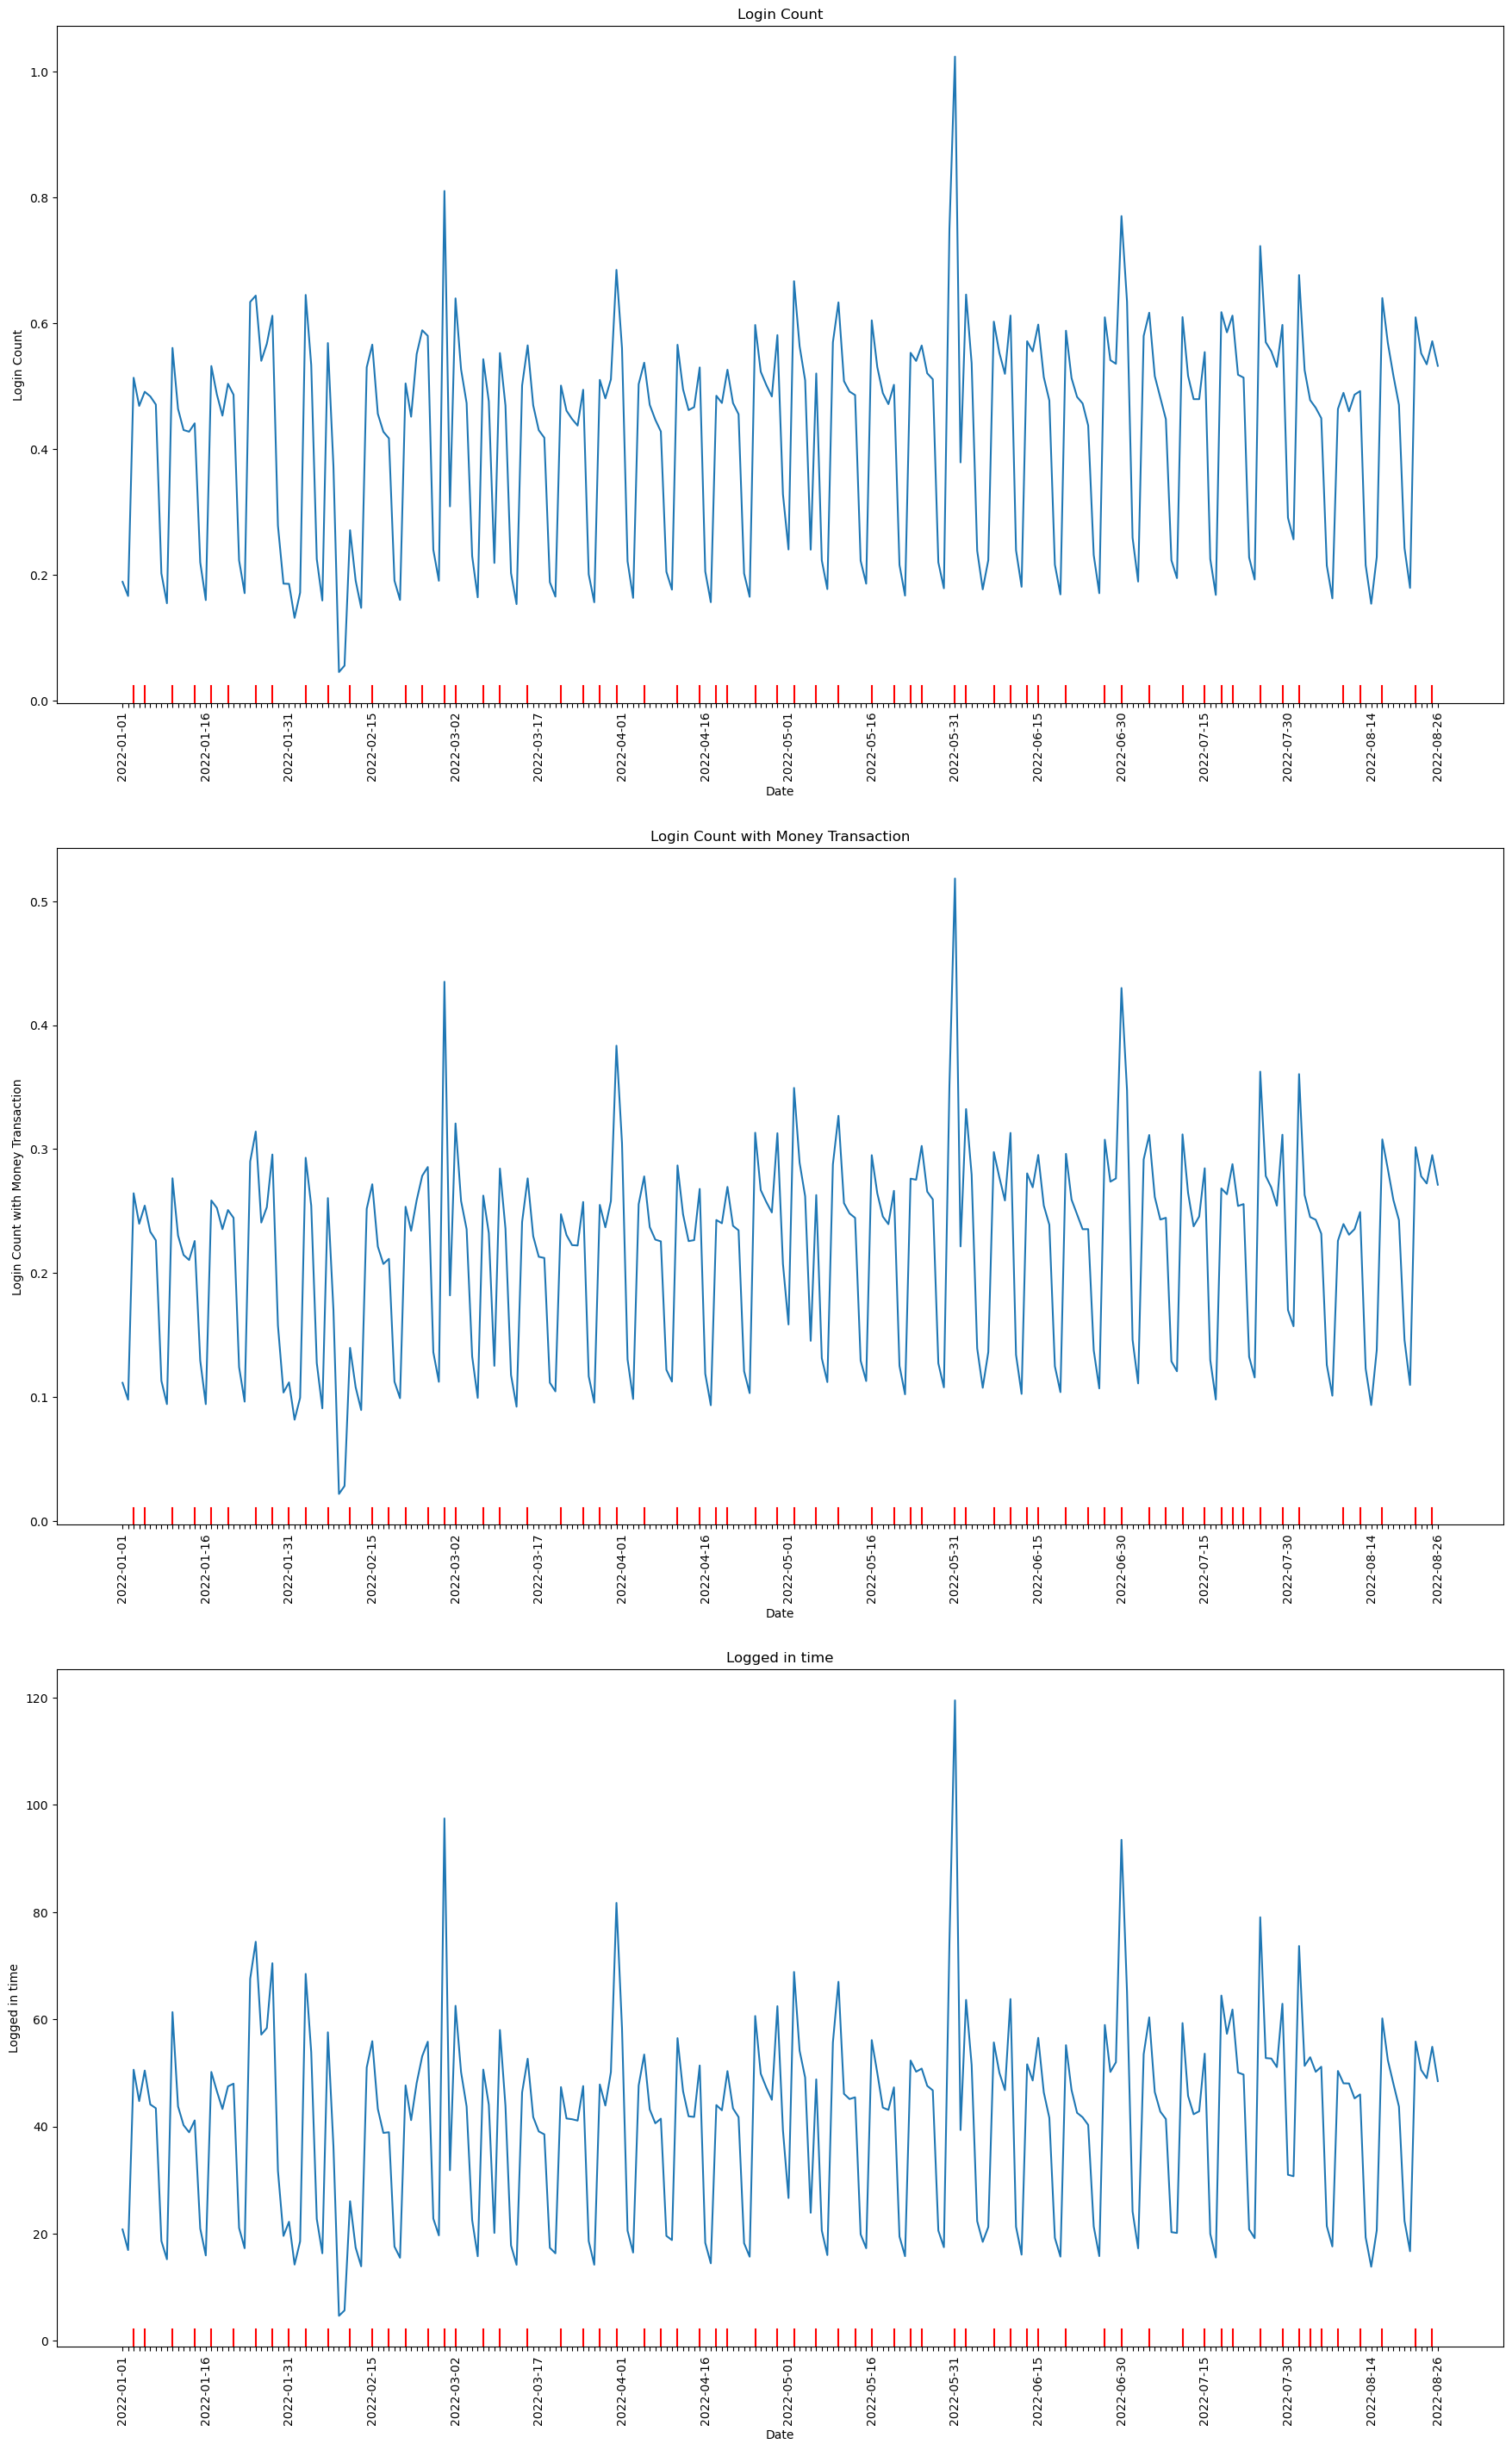

In [69]:
# Plot the difference between X_c_filtered and X_c_rest, X_t_filtered and X_t_rest, X_s_filtered and X_s_rest
fig, axes = plt.subplots(3, 1, figsize=(20, 30))
fig.tight_layout(pad=10.0)
axes[0].set_title("Login Count")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Login Count")
axes[0].plot(X_c_diff)
axes[0].set_xticklabels(daterange, rotation=90)
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Login Count with Money Transaction")
axes[1].plot(X_t_diff)
axes[1].set_xticklabels(daterange, rotation=90)
axes[2].set_title("Logged in time")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Logged in time")
axes[2].plot(X_s_diff)
axes[2].set_xticklabels(daterange, rotation=90)

# Draw a vertical line at the peaks of difference between X_c_filtered and X_c_rest, X_t_filtered and X_t_rest, X_s_filtered and X_s_rest
[axes[0].axvline(x=d, ymax=0.025, color="red") for d in peaks_c_diff]
[axes[1].axvline(x=d, ymax=0.025, color="red") for d in peaks_t_diff]
[axes[2].axvline(x=d, ymax=0.025, color="red") for d in peaks_s_diff]

plt.show()

In [79]:
date = pd.date_range("2022-01-01", "2022-08-26", freq="1D")
# Convert diff peaks to date
peaks_c_diff_date = [date[d] for d in peaks_c_diff]
peaks_t_diff_date = [date[d] for d in peaks_t_diff]
peaks_s_diff_date = [date[d] for d in peaks_s_diff]

# Export each of the peaks to csv file at ../data/peaks-.*.csv
pd.DataFrame(peaks_c_diff_date, columns=['date']).to_csv("../data/peaks-login-count.csv", index=False)
pd.DataFrame(peaks_t_diff_date, columns=['date']).to_csv("../data/peaks-login-count-with-money-transaction.csv", index=False)
pd.DataFrame(peaks_s_diff_date, columns=['date']).to_csv("../data/peaks-logged-in-time.csv", index=False)

In [80]:
# Get the difference between each peaks
peaks_c_diff_diff = np.diff(peaks_c_diff)
peaks_t_diff_diff = np.diff(peaks_t_diff)
peaks_s_diff_diff = np.diff(peaks_s_diff)
print("Login Count peaks difference: ", peaks_c_diff_diff)
print("Login Count with Money Transaction peaks difference: ", peaks_t_diff_diff)
print("Logged in time peaks difference: ", peaks_s_diff_diff)

Login Count peaks difference:  [2 5 4 3 3 5 3 6 4 4 4 6 3 4 2 5 3 5 6 4 3 3 5 6 4 3 2 5 4 3 4 4 6 4 3 2 6
 2 5 3 3 2 5 7 3 5 6 4 3 2 5 4 3 8 3 4 6 3]
Login Count with Money Transaction peaks difference:  [2 5 4 3 3 5 3 3 3 4 4 4 3 3 4 3 2 5 3 5 6 4 3 3 5 6 4 3 2 5 4 3 4 4 6 4 3
 2 6 2 5 3 3 2 5 4 3 3 5 3 3 4 3 2 2 3 4 3 8 3 4 6 3]
Logged in time peaks difference:  [2 5 4 3 4 4 3 3 3 4 4 4 3 3 4 3 2 5 3 5 6 4 3 3 5 3 3 4 3 2 5 4 3 4 4 3 3
 4 3 2 6 2 5 3 3 2 5 7 3 5 6 4 3 2 5 4 3 2 2 3 4 4 6 3]


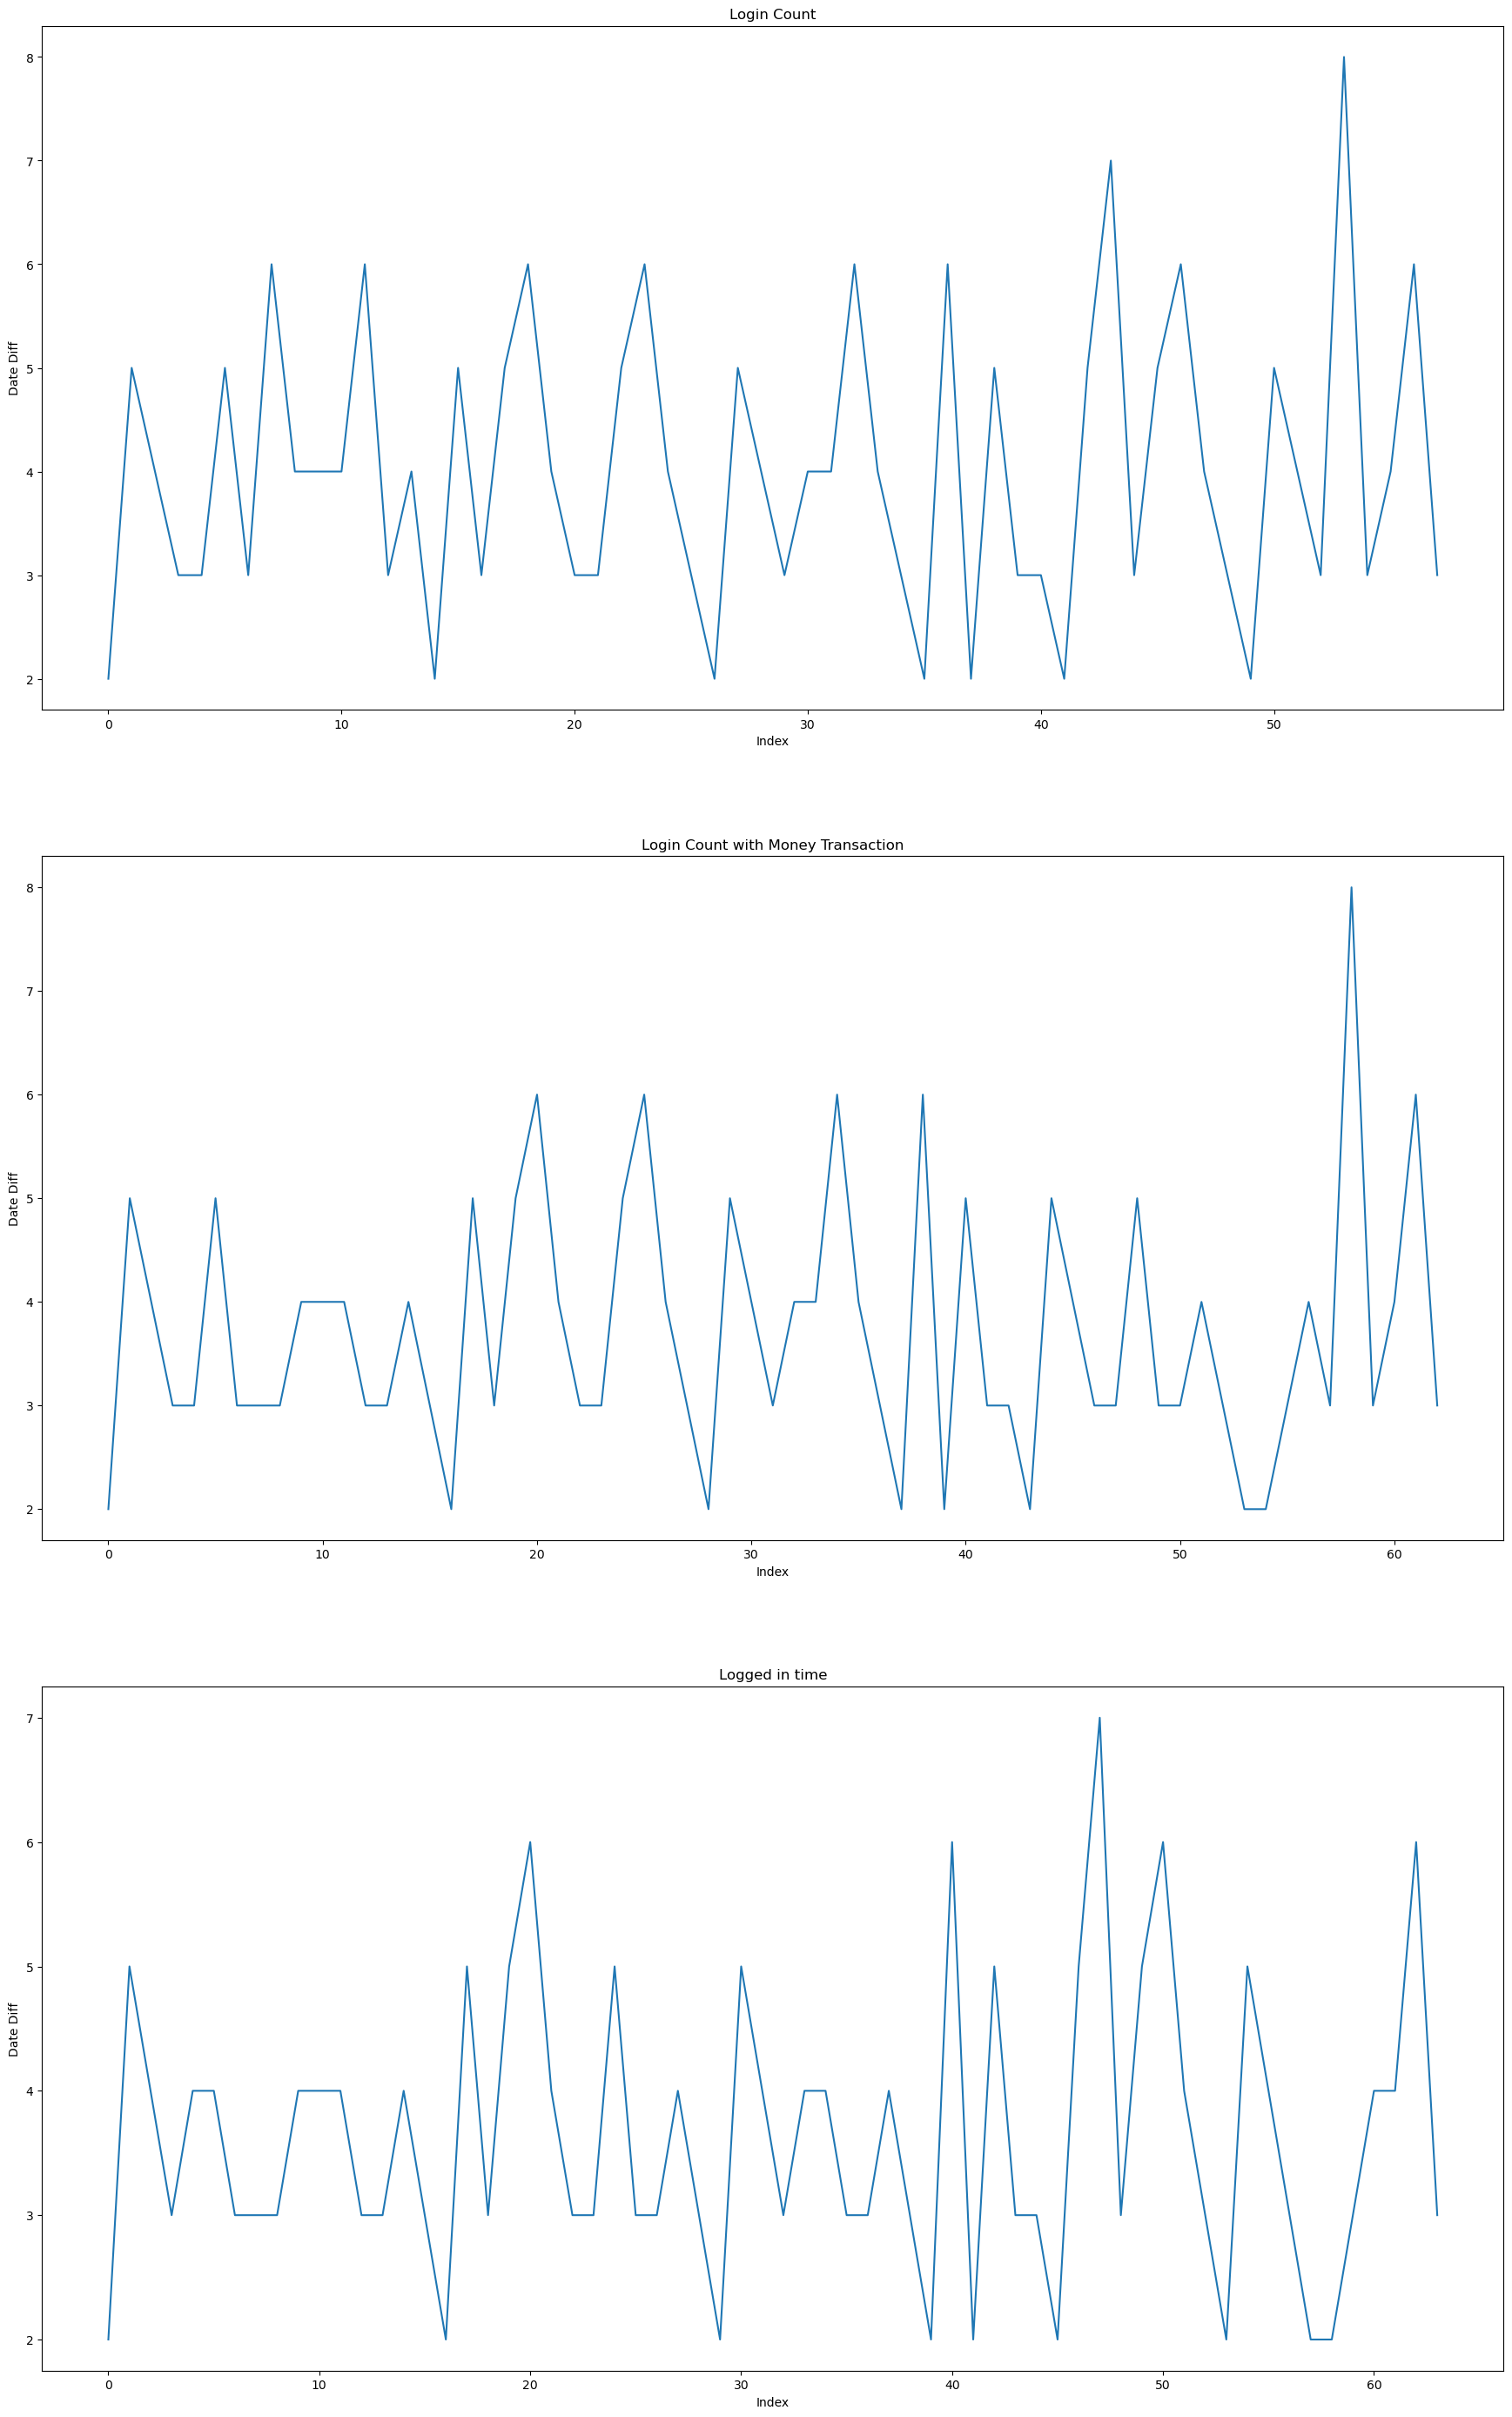

In [81]:
# Plot the difference between each peaks
fig, axes = plt.subplots(3, 1, figsize=(20, 30))
fig.tight_layout(pad=10.0)
axes[0].set_title("Login Count")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Date Diff")
axes[0].plot(peaks_c_diff_diff)
axes[1].set_title("Login Count with Money Transaction")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Date Diff")
axes[1].plot(peaks_t_diff_diff)
axes[2].set_title("Logged in time")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Date Diff")
axes[2].plot(peaks_s_diff_diff)
plt.show()